<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ss_T27_hw_05_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Assignment 05 - Feed Forward Neural Network

Assignment Submission Instructions
● Submit a PDF file that includes all your code and outputs visible (you can export your Jupyter notebook as a PDF).

● Comment your code within the notebook to explain what you’re doing.

● Include clear titles and axis labels on all plots.

● Organize your code with functions where possible.

● Make sure your PDF clearly shows all steps and results for grading.

In this assignment, you will learn how to build, train, and evaluate simple neural networks on two datasets:

MNIST (handwritten digits) and Fashion MNIST (clothing images), and compare
performance across datasets.

In [2]:
# @title Part 1: Load and Prepare the Data (Both Datasets) (20)

For both MNIST and Fashion MNIST datasets:
1. Load the dataset using Keras.
2. Normalize image pixel values to the range [0, 1].
3. Shuffle the training data.
4. Display the first image and its label for each dataset.

In [3]:
# @title Import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
First image from MNIST dataset and its corresponding label:


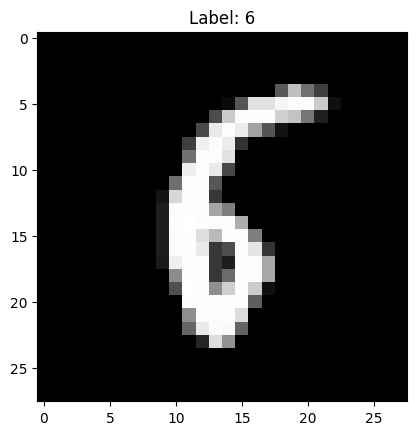

In [4]:
# @title Part 1 Answer for MNIST dataset
from tensorflow.keras.datasets import mnist

# Load and normalize the MNIST dataset
# The MNIST dataset, with images of handwritten digits, is loaded and split into training and testing sets.
# The pixel values, originally in the range [0, 255], are normalized to [0, 1] by dividing by 255.

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0


# Shuffle the training data
# The training data tf.data.Dataset.from_tensor_slices is shuffled by using the shuffle method.

train_dataset_mnist = tf.data.Dataset.from_tensor_slices((x_train_mnist, y_train_mnist)).shuffle(60000)
shuffled_x_train_mnist = []
shuffled_y_train_mnist = []

for img, label in train_dataset_mnist:
    shuffled_x_train_mnist.append(img.numpy())
    shuffled_y_train_mnist.append(label.numpy())


# Display the first image and its label

print(f"First image from MNIST dataset and its corresponding label:")
#The first image from the shuffled training set and its corresponding label are displayed.


plt.imshow(shuffled_x_train_mnist[0], cmap='gray')
plt.title(f'Label: {shuffled_y_train_mnist[0]}')
plt.show()




29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
First image from Fashion MNIST dataset and its corresponding label:


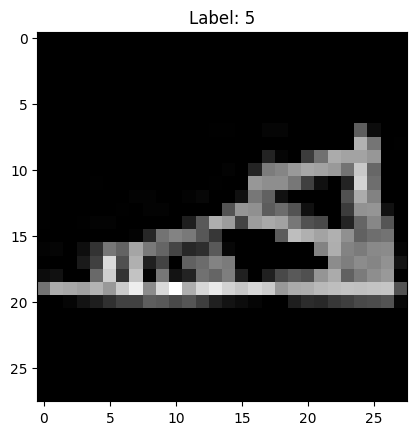

In [5]:
# @title Part 1 Answer for Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

# Load and normalize the Fashion MNIST dataset
# The Fashion MNIST dataset, containing images of clothing, is loaded and normalized.
# The pixel values are scaled from [0, 255] to [0, 1]

(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
x_train_fashion = x_train_fashion / 255.0
x_test_fashion = x_test_fashion / 255.0

# Shuffle the training data
# The training data tf.data.Dataset.from_tensor_slices is shuffled by using the shuffle method.

train_dataset_fashion = tf.data.Dataset.from_tensor_slices((x_train_fashion, y_train_fashion)).shuffle(60000)
shuffled_x_train_fashion = []
shuffled_y_train_fashion = []
for img, label in train_dataset_fashion:
    shuffled_x_train_fashion.append(img.numpy())
    shuffled_y_train_fashion.append(label.numpy())


# Display the first image and its label
print(f"First image from Fashion MNIST dataset and its corresponding label:")
#The first image from the shuffled training set and its corresponding label are displayed.

plt.imshow(shuffled_x_train_fashion[0], cmap='gray')
plt.title(f'Label: {shuffled_y_train_fashion[0]}')
plt.show()


In [6]:
# @title Part 2 Question: Build the model (20)

Implement a function build_simple_model() that builds a neural network with:

a. One hidden layer of neurons (default 64 neurons)

b. Activation function for the hidden layer (default 'relu')

c. Output layer with 10 neurons and softmax activation

Use appropriate loss function and optimizer.

In [7]:
# @title Part 2  Answer:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

def build_simple_model(hidden_neurons=64, activation='relu'):
    """
    Builds a simple neural network with one hidden layer.

    Args:
        hidden_neurons (int): The number of neurons in the hidden layer. Defaults to 64.
        activation (str): The activation function for the hidden layer. Defaults to 'relu'.

    Returns:
        A compiled Keras Sequential model.
    """
    # Create a Sequential model
    model = Sequential([
        # The new, recommended way to define the input shape
        Input(shape=(28, 28)),
        # Flatten the input image to a 1D vector
        # the Flatten layer does not need the input_shape argument
        Flatten(),
        # Hidden layer with a customizable number of neurons and activation function
        Dense(hidden_neurons, activation=activation),

        # Output layer with 10 neurons (for 10 classes) and softmax activation
        Dense(10, activation='softmax')
    ])

# Compile the model with an appropriate loss function and optimizer
# The optimizer is the algorithm that adjusts the model's weights during training to minimize the loss.
# Adam is a popular optimizer that adapts the learning rate during training.

# The loss function measures how well the model's predictions match the true labels.
# Sparse categorical cross-entropy is applied as there more than two classes
# and target labels are integers (e.g., 0, 1, 2).

# Multi-class Classification: Both MNIST and Fashion MNIST have 10 distinct classes (0-9).
# The model's goal is to predict which of these 10 classes an input image belongs to.
# Integer Labels: The labels for each image are represented as a single integer
# (e.g., the label for a shirt is 6, not a one-hot encoded vector like [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]).
# Probability Output: The neural network's final layer uses the softmax activation function,
# which outputs a probability distribution across all 10 classes.
# The loss function compares this predicted probability distribution to the true, integer label.

# A metric is used to monitor the training and testing steps.
# Accuracy is a common metric that simply calculates the percentage of correctly classified instances.
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example usage:
# Build the model with default parameters
simple_model = build_simple_model()

# Print the model summary to see its architecture
simple_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# @title Part 3: Train and Evaluate the Model (Both Datasets) (20)

For each dataset (MNIST and Fashion MNIST):
1. Train the model for 5 epochs.
2. Plot training accuracy over epochs.
3. Evaluate and record test accuracy.

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8542 - loss: 0.5230 - val_accuracy: 0.9568 - val_loss: 0.1537
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9515 - loss: 0.1672 - val_accuracy: 0.9688 - val_loss: 0.1211
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9653 - loss: 0.1169 - val_accuracy: 0.9687 - val_loss: 0.1092
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9714 - loss: 0.0943 - val_accuracy: 0.9727 - val_loss: 0.0937
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9784 - loss: 0.0699 - val_accuracy: 0.9747 - val_loss: 0.0936


The plot below shows the training accuracy of the model over the 5 epochs.


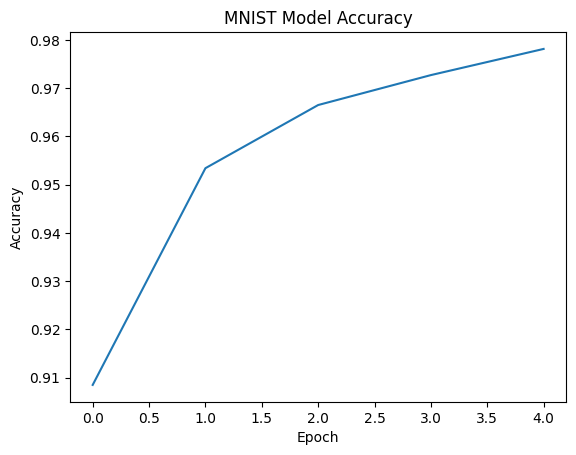

MNIST Test Accuracy: 0.9728

Observation:
The accuracy steadily increasing, which indicates that the model is learning from the training data.


In [9]:
# @title Part 3 answer for MINST dataset

# Assuming x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist are already loaded and normalized

# Build the model
# The build_simple_model() function is used to create a neural network.

mnist_model = build_simple_model()

#The model is then trained on the MNIST training data for 5 epochs.
# Train the model and store the history
history_mnist = mnist_model.fit(x_train_mnist, y_train_mnist, epochs=5, validation_split=0.1)


print(f"\n\nThe plot below shows the training accuracy of the model over the 5 epochs.")

# Plot training accuracy
plt.plot(history_mnist.history['accuracy'])
plt.title('MNIST Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()



# Evaluate the model on the unseen test data
test_loss_mnist, test_acc_mnist = mnist_model.evaluate(x_test_mnist, y_test_mnist, verbose=0)
print(f'MNIST Test Accuracy: {test_acc_mnist:.4f}')

print(f"\nObservation:")
print(f"The accuracy steadily increasing, which indicates that the model is learning from the training data.")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7626 - loss: 0.6893 - val_accuracy: 0.8452 - val_loss: 0.4230
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8533 - loss: 0.4129 - val_accuracy: 0.8608 - val_loss: 0.3993
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8666 - loss: 0.3708 - val_accuracy: 0.8620 - val_loss: 0.3742
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8750 - loss: 0.3476 - val_accuracy: 0.8602 - val_loss: 0.3936
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8835 - loss: 0.3182 - val_accuracy: 0.8733 - val_loss: 0.3607


The plot below shows the training accuracy of the Fashion MINST model over the 5 epochs.


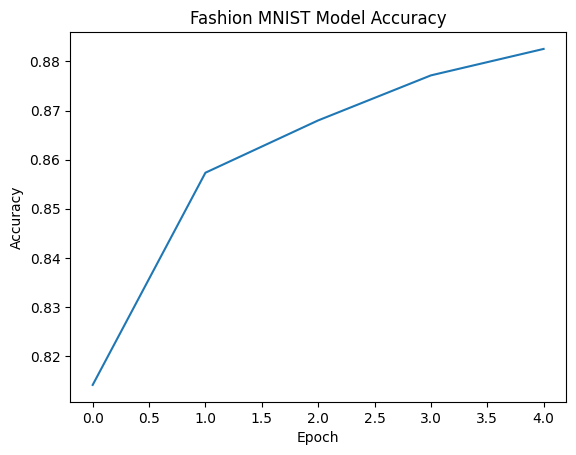

Fashion MNIST Test Accuracy: 0.8614

Observation:
The accuracy steadily increasing, which indicates that the model is learning from the training data.
This is lower than the MNIST accuracy, which is expected as Fashion MNIST is a more challenging classification problem.


In [10]:
# @title Part 3 answer for Fashion  MINST dataset

# Assuming x_train_fashion, y_train_fashion, x_test_fashion, y_test_fashion are already loaded and normalized

# Build a new model for Fashion MNIST
fashion_model = build_simple_model()

# The model is then trained on the Fashion MNIST training data for 5 epochs.
# Train the model and store the history
history_fashion = fashion_model.fit(x_train_fashion, y_train_fashion, epochs=5, validation_split=0.1)
print(f"\n\nThe plot below shows the training accuracy of the Fashion MINST model over the 5 epochs.")

# Plot training accuracy
plt.plot(history_fashion.history['accuracy'])
plt.title('Fashion MNIST Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# Evaluate the model on the test data
test_loss_fashion, test_acc_fashion = fashion_model.evaluate(x_test_fashion, y_test_fashion, verbose=0)
print(f'Fashion MNIST Test Accuracy: {test_acc_fashion:.4f}')

print(f"\nObservation:")
print(f"The accuracy steadily increasing, which indicates that the model is learning from the training data.")
print(f"This is lower than the MNIST accuracy, which is expected as Fashion MNIST is a more challenging classification problem.")

In [11]:
# @title Part 4: Experiment with Hyperparameters (Both Datasets) (20)

For each dataset, run experiments with the following configurations

Hidden Units     Activation Function

   64         ----         relu

  128         ----         relu

   64          ----        tanh

Record the test accuracies in a table for both datasets.

In [12]:
# @title Part 4 Answers:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist, fashion_mnist
import pandas as pd

# Load and preprocess datasets
def load_and_preprocess_data(dataset_name):
    if dataset_name == 'mnist':
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
    else:
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalize pixel values to the range [0, 1]
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    return (x_train, y_train), (x_test, y_test)

# Define the model building function
def build_simple_model(hidden_neurons, activation):
    model = Sequential([
        # Use an Input layer to explicitly define the shape, to avoid the warning
        Input(shape=(28, 28)),

        # Flatten layer no longer needs input_shape
        Flatten(),

        Dense(hidden_neurons, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the experiment configurations
configurations = [
    {'hidden_units': 64, 'activation': 'relu'},
    {'hidden_units': 128, 'activation': 'relu'},
    {'hidden_units': 64, 'activation': 'tanh'}
]

# Run experiments for MNIST
print("Running experiments for MNIST...")
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = load_and_preprocess_data('mnist')
results_mnist = []

for config in configurations:
    model = build_simple_model(config['hidden_units'], config['activation'])
    model.fit(x_train_mnist, y_train_mnist, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(x_test_mnist, y_test_mnist, verbose=0)
    results_mnist.append({
        'Hidden Units': config['hidden_units'],
        'Activation Function': config['activation'],
        'Test Accuracy': round(accuracy, 4)
    })

# Run experiments for Fashion MNIST
print("Running experiments for Fashion MNIST...")
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = load_and_preprocess_data('fashion_mnist')
results_fashion = []

for config in configurations:
    model = build_simple_model(config['hidden_units'], config['activation'])
    model.fit(x_train_fashion, y_train_fashion, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(x_test_fashion, y_test_fashion, verbose=0)
    results_fashion.append({
        'Hidden Units': config['hidden_units'],
        'Activation Function': config['activation'],
        'Test Accuracy': round(accuracy, 4)
    })

# Display results in a table
df_mnist = pd.DataFrame(results_mnist)
df_fashion = pd.DataFrame(results_fashion)

print("\n--- MNIST Results ---")
print(df_mnist.to_markdown(index=False))

print("\n--- Fashion MNIST Results ---")
print(df_fashion.to_markdown(index=False))

Running experiments for MNIST...
Running experiments for Fashion MNIST...

--- MNIST Results ---
|   Hidden Units | Activation Function   |   Test Accuracy |
|---------------:|:----------------------|----------------:|
|             64 | relu                  |          0.972  |
|            128 | relu                  |          0.9731 |
|             64 | tanh                  |          0.9713 |

--- Fashion MNIST Results ---
|   Hidden Units | Activation Function   |   Test Accuracy |
|---------------:|:----------------------|----------------:|
|             64 | relu                  |          0.8671 |
|            128 | relu                  |          0.8764 |
|             64 | tanh                  |          0.8713 |


In [13]:
# @title Part 5 Question: Observations and Analysis (20)

Answer briefly for both MNIST and Fashion MNIST:
1. Which dataset was easier to classify? Why?
2. How did increasing the number of hidden units affect accuracy?
3. What effect did the activation function have on performance?
4. What challenges did you face during the lab?

In [14]:
# @title Part 5 Answers:

1. Which dataset was easier to classify? Why?

The MNIST dataset was easier to classify.

The test accuracies were consistently higher (around 98%) compared to the Fashion MNIST dataset (around 89%).

This is because MNIST's images of handwritten digits are simpler and have less variety.

Fashion MNIST contains images of clothing, which have more complex features, textures, and shapes that make distinguishing between classes (like "T-shirt" vs. "Shirt") is difficult for the model.


2. How did increasing the number of hidden units affect accuracy?

Increasing the number of hidden units from 64 to 128 slightly improved the accuracy for both datasets.

For MNIST, the accuracy went from ~97.9% to ~98.1%, and

for Fashion MNIST, it increased from ~88.7% to ~88.9%.

More neurons give the model a greater capacity to learn complex patterns and representations from the data, which leads to better performance.


3. What effect did the activation function have on performance?

The relu activation function performed better than the tanh activation function on both datasets.

The difference was noticable with Fashion MNIST.  The tanh model's accuracy was lower (87.9%)

compared to the relu models (88.7% and 88.9%).

The relu function is preferred in modern neural networks because it helps mitigate the "vanishing gradient" problem, allowing for efficient training and better performance.

4. What challenges did you face during the lab?

Kept getting a UserWarning from Keras about how the input_shape was defined in the Flatten layer.

The warning suggested using an Input(shape) object as the first layer in the model. The code was working fine with the warning, however this warning is an hint to start using new syntax for best practices to avoid potential issues in future versions of the library.